In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from scipy.stats import zscore
import matplotlib.pyplot as plt



In [4]:
train = pd.read_csv('GSE131617-GPL5175_series_matrix.csv')
train

,SampleID,2315554,2315633,2315674,2315739,2315894,2315918,2315951,2316218,2316245,...,4134740,7385511,7385515,7385547,7385552,7385611,7385641,7385683,7385696,Stage
0,GSM3790983,6.43891,6.83356,6.79662,6.98153,8.47884,6.39790,8.05315,5.13288,9.70847,...,12.0644,5.72306,12.5030,6.16934,7.91356,9.16437,8.72599,9.07132,9.53783,braak nft stage: 0
1,GSM3790984,6.40143,6.86543,6.75745,6.65715,8.03744,5.94079,7.55167,5.32501,9.65743,...,11.8037,5.86603,12.6619,5.59310,7.65888,9.04881,9.43963,9.57415,9.65041,braak nft stage: 0
2,GSM3790985,6.68846,6.81464,6.98996,6.95574,8.68579,5.99805,7.73023,6.25566,9.55489,...,11.6599,6.34350,12.4164,5.80739,7.80790,9.05009,9.04095,8.93636,9.45822,braak nft stage: 0
3,GSM3790986,6.87754,7.06805,7.10421,7.14944,8.29076,6.69035,8.14828,6.90181,9.57645,...,11.6293,6.17589,11.9352,6.77307,7.88880,8.97097,9.23244,8.76577,9.51229,braak nft stage: 0
4,GSM3790987,7.01006,7.07767,7.09086,7.10217,8.31406,6.87333,8.33996,6.23292,9.62773,...,11.4922,6.29821,11.9637,6.60827,7.48310,9.24775,9.40353,9.07211,9.39487,braak nft stage: 0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,GSM3791191,6.93216,6.77573,7.12525,7.15875,8.73779,6.28428,8.09200,6.04200,9.57499,...,11.8000,6.05153,12.3150,5.68991,7.38817,9.15810,9.51608,9.47241,9.56686,braak nft stage: V-VI
209,GSM3791192,6.48653,6.59228,6.75529,6.86929,8.21996,5.98828,7.84425,5.91187,9.60459,...,11.7704,5.89774,12.4962,5.72242,7.80241,9.00913,9.64469,9.62536,9.50187,braak nft stage: V-VI
210,GSM3791193,6.75165,6.72161,7.01555,6.84764,8.71742,5.61409,8.08311,6.11234,9.04358,...,11.9613,5.70733,12.4516,6.73607,8.13284,8.83461,8.93884,9.01439,9.66904,braak nft stage: V-VI
211,GSM3791194,6.37197,6.59368,6.62437,6.83913,8.36763,6.04839,7.50381,6.08864,9.66116,...,11.8128,6.21942,12.4051,5.46091,7.88878,9.08103,9.86170,9.66663,9.70651,braak nft stage: V-VI


In [5]:
train.iloc[:,0:10].describe()

,2315554,2315633,2315674,2315739,2315894,2315918,2315951,2316218,2316245
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,6.697996,6.894706,6.923796,7.006640,8.402404,6.285585,8.038695,6.075413,9.484151
std,0.223730,0.199992,0.227498,0.202001,0.348844,0.356099,0.324059,0.413042,0.400935
min,6.034340,6.471290,6.305520,6.539470,7.654820,5.067330,7.402590,4.870180,7.592270
25%,6.540860,6.732120,6.759670,6.869870,8.173740,6.051790,7.779960,5.758910,9.362240
50%,6.704290,6.907320,6.939310,7.000610,8.368350,6.284750,8.062020,6.078430,9.557500
75%,6.863130,7.053030,7.094600,7.150930,8.576430,6.552890,8.224210,6.360750,9.721220
max,7.306810,7.396870,7.588130,7.691720,9.457030,7.162320,8.954120,7.005730,10.148000


# Class distribution + Handling Imbalanced Classes

<Axes: xlabel='Stage'>

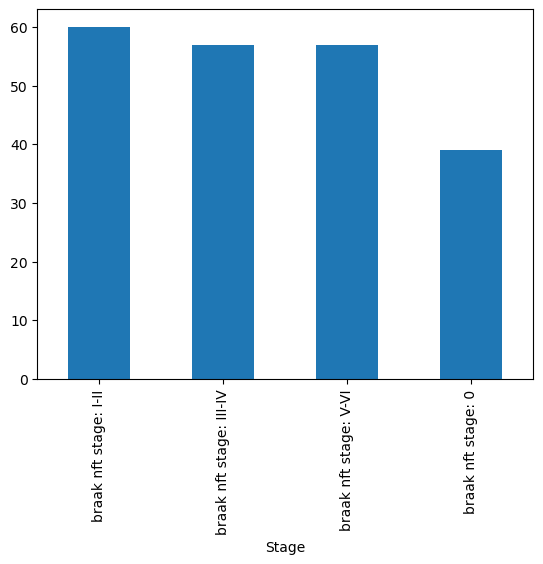

In [6]:
train['Stage'].value_counts().plot.bar()

# Identify Missing Values with : isnull + sum



In [7]:
train.info()
train.isnull().sum()
# train.isnull().sum().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Columns: 22013 entries, SampleID to Stage
dtypes: float64(22011), object(2)
memory usage: 35.8+ MB


SampleID    0
2315554     0
2315633     0
2315674     0
2315739     0
           ..
7385611     0
7385641     0
7385683     0
7385696     0
Stage       0
Length: 22013, dtype: int64

# Divide Data into X and y


In [8]:
y = train['Stage']
X = train.drop(['Stage','SampleID'], axis = 1)
X.head()

,2315554,2315633,2315674,2315739,2315894,2315918,2315951,2316218,2316245,2316379,...,4133728,4134740,7385511,7385515,7385547,7385552,7385611,7385641,7385683,7385696
0,6.43891,6.83356,6.79662,6.98153,8.47884,6.39790,8.05315,5.13288,9.70847,8.71787,...,9.69633,12.0644,5.72306,12.5030,6.16934,7.91356,9.16437,8.72599,9.07132,9.53783
1,6.40143,6.86543,6.75745,6.65715,8.03744,5.94079,7.55167,5.32501,9.65743,8.23118,...,9.05303,11.8037,5.86603,12.6619,5.59310,7.65888,9.04881,9.43963,9.57415,9.65041
2,6.68846,6.81464,6.98996,6.95574,8.68579,5.99805,7.73023,6.25566,9.55489,8.25945,...,9.36504,11.6599,6.34350,12.4164,5.80739,7.80790,9.05009,9.04095,8.93636,9.45822
3,6.87754,7.06805,7.10421,7.14944,8.29076,6.69035,8.14828,6.90181,9.57645,8.49994,...,9.37674,11.6293,6.17589,11.9352,6.77307,7.88880,8.97097,9.23244,8.76577,9.51229
4,7.01006,7.07767,7.09086,7.10217,8.31406,6.87333,8.33996,6.23292,9.62773,8.28019,...,8.98042,11.4922,6.29821,11.9637,6.60827,7.48310,9.24775,9.40353,9.07211,9.39487


# feature scaling

In [9]:
min_values = np.min(X, axis=0)
max_values = np.max(X, axis=0)
print('min values')
print(min_values)
print('max values')
print(max_values)

min values
2315554    6.03434
2315633    6.47129
2315674    6.30552
2315739    6.53947
2315894    7.65482
            ...   
7385552    6.93654
7385611    8.27255
7385641    6.47818
7385683    7.55057
7385696    8.58941
Length: 22011, dtype: float64
max values
2315554     7.30681
2315633     7.39687
2315674     7.58813
2315739     7.69172
2315894     9.45703
             ...   
7385552     8.94979
7385611     9.86865
7385641    10.13330
7385683    10.20570
7385696    10.23880
Length: 22011, dtype: float64


## Identify Categorical Features


In [10]:
categorical_features = train.select_dtypes(include = ['object']).columns.values
categorical_features

array(['SampleID', 'Stage'], dtype=object)

## Identify Numerical Features


In [11]:
numerical_features = X.select_dtypes(include = ['int64','float64']).columns.values
numerical_features

array(['2315554', '2315633', '2315674', ..., '7385641', '7385683',
       '7385696'], dtype=object)

# Identify Missing Values with : percentage of missing values



In [12]:
missing_values_proportion = train.isnull().sum() / len(train)
threshold = 0.3

# Filter columns with more than 30% missing values
columns_with_more_than_30_percent_missing = missing_values_proportion[missing_values_proportion >= threshold]

print("Features with more than 30% missing values:")
print(columns_with_more_than_30_percent_missing)

# Filter columns with missing values between 10% and 30%
condition = (missing_values_proportion > 0) & (missing_values_proportion <= 0.3)
columns_with_missing_values_between_10_and_30_percent = missing_values_proportion[condition].index

# Print the columns with missing values between 10% and 30%
print("features with missing values between 10% and 30%:")
print(columns_with_missing_values_between_10_and_30_percent)


Features with more than 30% missing values:
Series([], dtype: float64)
features with missing values between 10% and 30%:
Index([], dtype='object')


# Eliminate Features with > 30% Missing Values

In [13]:
# Drop columns with more than 30% missing values
train = train.drop(columns=columns_with_more_than_30_percent_missing.index)

# Impute Missing Values ( Numerical Features)



# KNN imputation less than 30%

If you didn’t specify ‘k’, the KNNImputer defaults to using 5 nearest neighbors

In [14]:
numerical_columns_with_less_than_30_percent_missing = missing_values_proportion[(missing_values_proportion < threshold) & X[numerical_features].isnull().any()].index

if len(numerical_columns_with_less_than_30_percent_missing) > 0:
    num_imputer = KNNImputer()
    X[numerical_columns_with_less_than_30_percent_missing] = num_imputer.fit_transform(X[numerical_columns_with_less_than_30_percent_missing])


# Check

In [15]:
X.isnull().sum()

2315554    0
2315633    0
2315674    0
2315739    0
2315894    0
          ..
7385552    0
7385611    0
7385641    0
7385683    0
7385696    0
Length: 22011, dtype: int64

In [16]:
# Concatenate 'SampleID', y (target variable), and the imputed X DataFrame
imputed_train = pd.concat([train['SampleID'], y, X], axis=1)
print(imputed_train.head())


     SampleID               Stage  2315554  2315633  2315674  2315739  \
0  GSM3790983  braak nft stage: 0  6.43891  6.83356  6.79662  6.98153   
1  GSM3790984  braak nft stage: 0  6.40143  6.86543  6.75745  6.65715   
2  GSM3790985  braak nft stage: 0  6.68846  6.81464  6.98996  6.95574   
3  GSM3790986  braak nft stage: 0  6.87754  7.06805  7.10421  7.14944   
4  GSM3790987  braak nft stage: 0  7.01006  7.07767  7.09086  7.10217   

   2315894  2315918  2315951  2316218  ...  4133728  4134740  7385511  \
0  8.47884  6.39790  8.05315  5.13288  ...  9.69633  12.0644  5.72306   
1  8.03744  5.94079  7.55167  5.32501  ...  9.05303  11.8037  5.86603   
2  8.68579  5.99805  7.73023  6.25566  ...  9.36504  11.6599  6.34350   
3  8.29076  6.69035  8.14828  6.90181  ...  9.37674  11.6293  6.17589   
4  8.31406  6.87333  8.33996  6.23292  ...  8.98042  11.4922  6.29821   

   7385515  7385547  7385552  7385611  7385641  7385683  7385696  
0  12.5030  6.16934  7.91356  9.16437  8.72599  9.07132

# Export Imputed Features


In [17]:
imputed_train.to_csv('GSE131617-GPL5175_series_matrix_imputed.csv')

# Apply log transformation to numerical features

In [18]:
# Find features with negative or zero values
neg_zero_features = imputed_train[numerical_features].columns[(imputed_train[numerical_features] <= 0).any()]
print(neg_zero_features)

# Shift negative or zero values to ensure all values are positive
imputed_train[neg_zero_features] += abs(imputed_train[neg_zero_features].min()) + 1

# Apply log transformation to numerical features
imputed_train[numerical_features] = np.log1p(imputed_train[numerical_features])

# Display the head of the imputed_train DataFrame after log transformation
print(imputed_train.head())


Index([], dtype='object')
     SampleID               Stage   2315554   2315633   2315674   2315739  \
0  GSM3790983  braak nft stage: 0  2.006724  2.058417  2.053690  2.077130   
1  GSM3790984  braak nft stage: 0  2.001673  2.062477  2.048654  2.035640   
2  GSM3790985  braak nft stage: 0  2.039721  2.055999  2.078186  2.073894   
3  GSM3790986  braak nft stage: 0  2.064016  2.087912  2.092384  2.097949   
4  GSM3790987  braak nft stage: 0  2.080698  2.089103  2.090735  2.092132   

    2315894   2315918   2315951   2316218  ...   4133728   4134740   7385511  \
0  2.249062  2.001196  2.203113  1.813664  ...  2.369901  2.569891  1.905543   
1  2.201376  1.937416  2.146127  1.844512  ...  2.307874  2.549734  1.926586   
2  2.270660  1.945632  2.166792  1.981782  ...  2.338439  2.538440  1.993816   
3  2.229020  2.039966  2.213566  2.067092  ...  2.339567  2.536020  1.970727   
4  2.231525  2.063481  2.234302  1.978643  ...  2.300625  2.525104  1.987629   

    7385515   7385547   738555

# New range after LOG

In [19]:
min_values_log = imputed_train[numerical_features].min()
max_values_log = imputed_train[numerical_features].max()

print('Min values after log transformation:')
print(min_values_log)
print('\nMax values after log transformation:')
print(max_values_log)



Min values after log transformation:
2315554    1.950804
2315633    2.011068
2315674    1.988630
2315739    2.020152
2315894    2.158116
             ...   
7385552    2.071477
7385611    2.227058
7385641    2.011989
7385683    2.145998
7385696    2.260659
Length: 22011, dtype: float64

Max values after log transformation:
2315554    2.117076
2315633    2.127859
2315674    2.150381
2315739    2.162371
2315894    2.347274
             ...   
7385552    2.297551
7385611    2.385882
7385641    2.409941
7385683    2.416423
7385696    2.419372
Length: 22011, dtype: float64


# visualize the effects of the log transformation

# For few features

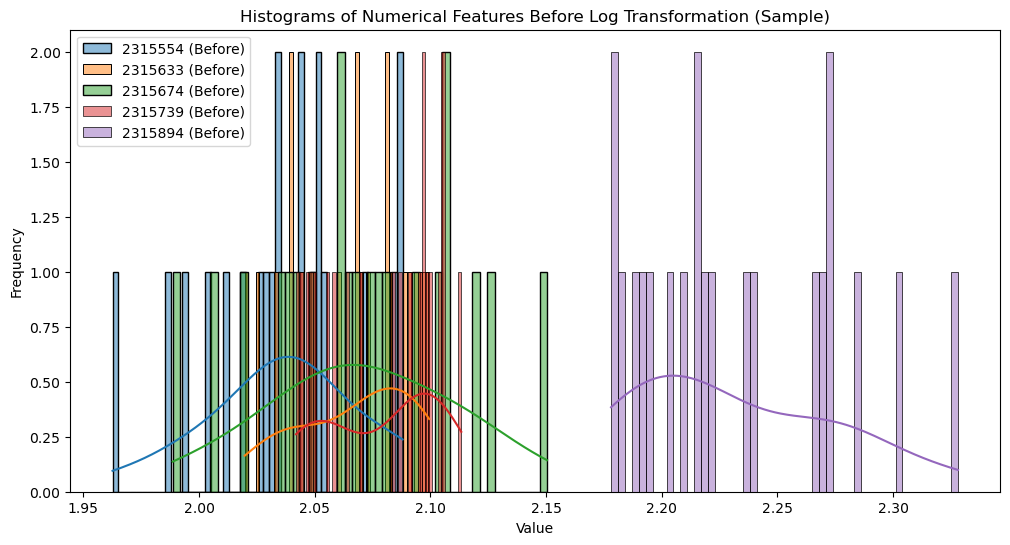

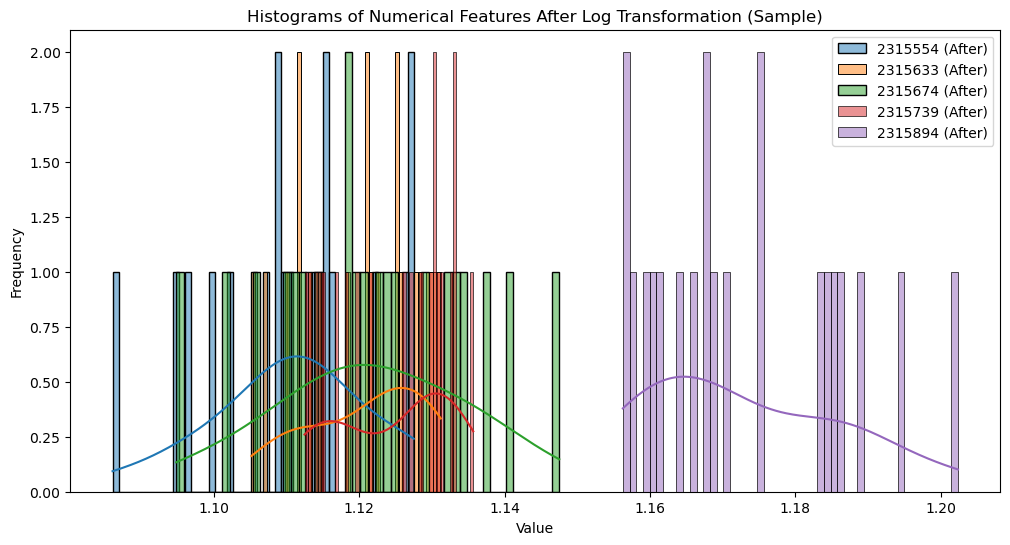

Summary Statistics Before Log Transformation:
         2315554    2315633    2315674    2315739    2315894
count  21.000000  21.000000  21.000000  21.000000  21.000000
mean    2.036140   2.066709   2.070223   2.078772   2.231835
std     0.032761   0.025176   0.041047   0.024374   0.043874
min     1.962593   2.019723   1.988630   2.041875   2.178059
25%     2.019682   2.044352   2.040764   2.055641   2.194786
50%     2.034976   2.070089   2.067664   2.087298   2.217515
75%     2.051996   2.088816   2.102838   2.098132   2.269491
max     2.087964   2.099466   2.150381   2.113324   2.328030

Summary Statistics After Log Transformation:
         2315554    2315633    2315674    2315739    2315894
count  21.000000  21.000000  21.000000  21.000000  21.000000
mean    1.110532   1.120573   1.121665   1.124501   1.172963
std     0.010809   0.008224   0.013374   0.007925   0.013527
min     1.086065   1.105165   1.094815   1.112474   1.156271
25%     1.105152   1.113288   1.112109   1.116989   1.

In [20]:
import warnings
warnings.filterwarnings("ignore", message="use_inf_as_na option is deprecated", category=FutureWarning)

with pd.option_context('mode.use_inf_as_na', True):
    # Import seaborn and use it here
    import seaborn as sns
# Select a subset of numerical features and a sample of the data
sample_numerical_features = numerical_features[:5]
sample_data = imputed_train.sample(frac=0.1, random_state=42)

# Plot histograms of numerical features before log transformation
plt.figure(figsize=(12, 6))
for feature in sample_numerical_features:
    sns.histplot(sample_data[feature], bins=50, alpha=0.5, label=feature + " (Before)", kde=True)
plt.title("Histograms of Numerical Features Before Log Transformation (Sample)")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Plot histograms of numerical features after log transformation
plt.figure(figsize=(12, 6))
for feature in sample_numerical_features:
    sns.histplot(np.log1p(sample_data[feature]), bins=50, alpha=0.5, label=feature + " (After)", kde=True)
plt.title("Histograms of Numerical Features After Log Transformation (Sample)")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Print summary statistics for each numerical feature
print("Summary Statistics Before Log Transformation:")
print(sample_data[sample_numerical_features].describe())
print("\nSummary Statistics After Log Transformation:")
print(np.log1p(sample_data[sample_numerical_features]).describe())


# another aproach to hundle pos and neg and 0 values  with log

In [21]:
# Find the minimum value across numerical features
min_value = imputed_train[numerical_features].min().min()

# If the minimum value is negative, add its absolute value plus 1 to all values
if min_value < 0:
    offset = np.abs(min_value) + 1
    imputed_train[numerical_features] += offset

imputed_train[numerical_features] = np.log1p(imputed_train[numerical_features])

print(imputed_train.head())


     SampleID               Stage   2315554   2315633   2315674   2315739  \
0  GSM3790983  braak nft stage: 0  1.100851  1.117897  1.116351  1.123997   
1  GSM3790984  braak nft stage: 0  1.099170  1.119224  1.114700  1.110422   
2  GSM3790985  braak nft stage: 0  1.111766  1.117107  1.124340  1.122945   
3  GSM3790986  braak nft stage: 0  1.119726  1.127495  1.128942  1.130740   
4  GSM3790987  braak nft stage: 0  1.125156  1.127881  1.128409  1.128861   

    2315894   2315918   2315951   2316218  ...   4133728   4134740   7385511  \
0  1.178366  1.099011  1.164123  1.034488  ...  1.214883  1.272535  1.066620   
1  1.163581  1.077530  1.146172  1.045391  ...  1.196306  1.266873  1.073837   
2  1.184992  1.080323  1.152719  1.092521  ...  1.205503  1.263686  1.096549   
3  1.172179  1.111846  1.167381  1.120730  ...  1.205841  1.263002  1.088807   
4  1.172954  1.119552  1.173813  1.091468  ...  1.194112  1.259910  1.094480   

    7385515   7385547   7385552   7385611   7385641   73

# Check if any new missing values were generated after log

In [22]:
missing_values_after = imputed_train.isnull().sum()

if (missing_values_after > 0).any():
    print("New missing values were generated after the log transformation:")
    print(missing_values_after[missing_values_after > 0])
else:
    print("No new missing values were generated after the log transformation.")


No new missing values were generated after the log transformation.


# Outliers before applying yeojohnson transformation

In [23]:

numerical_columns = imputed_train.select_dtypes(include=['int64', 'float64']).columns


outliers_info = {}

for col in numerical_columns:
    z_scores = zscore(imputed_train[col])
    outliers_mask = (z_scores > threshold) | (z_scores < -threshold)
    if outliers_mask.any():
        outliers_info[col] = outliers_mask.sum()

print("Columns with outliers:")
for col, count in outliers_info.items():
    print(f"Column '{col}' has {count} outliers.")
 
    num_columns_with_outliers = len(outliers_info)
print("Number of columns with outliers:", num_columns_with_outliers)

Columns with outliers:
Column '2315554' has 163 outliers.
Column '2315633' has 179 outliers.
Column '2315674' has 175 outliers.
Column '2315739' has 170 outliers.
Column '2315894' has 149 outliers.
Column '2315918' has 160 outliers.
Column '2315951' has 164 outliers.
Column '2316218' has 165 outliers.
Column '2316245' has 142 outliers.
Column '2316379' has 167 outliers.
Column '2316558' has 159 outliers.
Column '2316605' has 166 outliers.
Column '2316746' has 167 outliers.
Column '2316905' has 158 outliers.
Column '2316953' has 162 outliers.
Column '2317246' has 161 outliers.
Column '2317317' has 157 outliers.
Column '2317434' has 165 outliers.
Column '2317472' has 162 outliers.
Column '2317512' has 167 outliers.
Column '2317686' has 146 outliers.
Column '2318086' has 168 outliers.
Column '2318157' has 167 outliers.
Column '2318170' has 165 outliers.
Column '2318212' has 167 outliers.
Column '2318242' has 176 outliers.
Column '2318257' has 164 outliers.
Column '2318338' has 164 outlier

# apply yeojohnson transformation for hundle outliers 

In [24]:
from scipy.optimize import minimize_scalar

# Define the Yeo-Johnson transformation function
def yeojohnson_transform(x, lmbda):
    if lmbda == 0:
        return np.log1p(x)
    else:
        return np.where(x >= 0, (x ** lmbda - 1) / lmbda, -((-x) ** lmbda - 1) / lmbda)

# Define the negative log-likelihood function for Yeo-Johnson transformation
def neg_llf(lmbda, data):
    y = yeojohnson_transform(data, lmbda)
    llf = _yeojohnson_llf(lmbda, data)  # You need to implement this function
    if llf is None:
        return float('inf')  # Return a large value to indicate failure
    return -llf

# Define the negative log-likelihood function specific to Yeo-Johnson
def _yeojohnson_llf(lmbda, data):
    # Implement the log-likelihood function based on your specific requirements
    pass

# Apply the Yeo-Johnson transformation to numerical features
for col in numerical_features:
    # Optimize lambda parameter using a custom initial point
    res = minimize_scalar(neg_llf, args=(imputed_train[col],), method='bounded', bounds=(-2, 2))
    lmbda = res.x
    transformed_data = yeojohnson_transform(imputed_train[col], lmbda)
    imputed_train[col] = transformed_data


# check if there is still outliers

In [25]:

numerical_columns = imputed_train.select_dtypes(include=['int64', 'float64']).columns


outliers_info = {}

for col in numerical_columns:
    z_scores = zscore(imputed_train[col])
    outliers_mask = (z_scores > threshold) | (z_scores < -threshold)
    if outliers_mask.any():
        outliers_info[col] = outliers_mask.sum()

print("Columns with outliers:")
for col, count in outliers_info.items():
    print(f"Column '{col}' has {count} outliers.")
    
    
    
    
    
    num_columns_with_outliers = len(outliers_info)
print("Number of columns with outliers:", num_columns_with_outliers)

Columns with outliers:
Column '2315554' has 162 outliers.
Column '2315633' has 179 outliers.
Column '2315674' has 175 outliers.
Column '2315739' has 170 outliers.
Column '2315894' has 149 outliers.
Column '2315918' has 159 outliers.
Column '2315951' has 163 outliers.
Column '2316218' has 165 outliers.
Column '2316245' has 143 outliers.
Column '2316379' has 167 outliers.
Column '2316558' has 159 outliers.
Column '2316605' has 166 outliers.
Column '2316746' has 167 outliers.
Column '2316905' has 158 outliers.
Column '2316953' has 162 outliers.
Column '2317246' has 161 outliers.
Column '2317317' has 158 outliers.
Column '2317434' has 165 outliers.
Column '2317472' has 162 outliers.
Column '2317512' has 167 outliers.
Column '2317686' has 146 outliers.
Column '2318086' has 168 outliers.
Column '2318157' has 166 outliers.
Column '2318170' has 166 outliers.
Column '2318212' has 166 outliers.
Column '2318242' has 174 outliers.
Column '2318257' has 165 outliers.
Column '2318338' has 164 outlier

# imputation after transformation 

In [26]:
# Perform imputation on the transformed data
imputer = KNNImputer()

missing_values = imputed_train[numerical_features].isnull().sum()
if missing_values.sum() > 0:
    print("New missing values were generated after the Yeo-Johnson transformation.")

    # Step 2: Filter numerical features with missing values
    features_with_missing_values = missing_values[missing_values > 0].index

    # Step 3: Impute missing values using 

    imputed_train[features_with_missing_values] = imputer.fit_transform(imputed_train[features_with_missing_values])

    # Step 4: Verify if missing values are filled after imputation
    missing_values_after_imputation = imputed_train[numerical_features].isnull().sum()
    if missing_values_after_imputation.sum() == 0:
        print("Imputation successful. No missing values remain.")
    else:
        print("Imputation unsuccessful. Missing values persist after imputation.")
else:
    print("No new missing values were generated after Yeo-Johnson transformation.")


No new missing values were generated after Yeo-Johnson transformation.


In [27]:
# Save the DataFrame to a new CSV file after log transformation
imputed_train.to_csv('GSE131617-GPL5175_series_matrix_imputed_log.csv', index=False)